In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [74]:
A=[]
B=[]
for i in range(10):
    x1=np.random.normal(loc=0.0, scale=1, size=1)[0]
    y1=np.random.normal(loc=1, scale=1, size=1)[0]
    x2=np.random.normal(loc=1, scale=1, size=1)[0]
    y2=np.random.normal(loc=0, scale=1, size=1)[0]
    a=(x1,y1)
    b=(x2,y2)
    A.append(a)
    B.append(b)

In [3]:
a=[]
b=[]

for x in A:
    for i in range(10):
        x1=np.random.normal(loc=x[0], scale=1/3, size=1)[0]
        y1=np.random.normal(loc=x[1], scale=1/3, size=1)[0]
        a.append(x1)
        b.append(y1)
data1 = {"X-values (O)": a, "Y-values (O)": b}
df1 = pd.DataFrame(data1)

c=[]
d=[]
for y in B:
    for i in range(10):
        x2=np.random.normal(loc=y[0], scale=1/3, size=1)[0]
        y2=np.random.normal(loc=y[1], scale=1/3, size=1)[0]
        c.append(x2)
        d.append(y2)
data2 = {"X-values (B)": c, "Y-values (B)": d}
df2 = pd.DataFrame(data2)

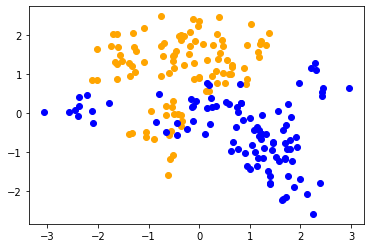

In [70]:
plt.scatter(df1["X-values (O)"],df1["Y-values (O)"],color="orange")
plt.scatter(df2["X-values (B)"],df2["Y-values (B)"],color="blue")

In [75]:
means_1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means_2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [76]:
means=[means_1,means_2]

In [77]:
means_1

array([[-1.61633035, -0.54870601],
       [ 1.44135798,  0.16846502],
       [ 0.72171905, -0.44711824],
       [-0.06210972,  0.28169993],
       [ 0.94272709, -0.06948912],
       [ 0.46234564,  1.78663952],
       [-0.92366914,  0.86007641],
       [-0.88175422,  0.3137327 ],
       [ 0.89550799,  0.63213996],
       [ 0.31984312,  0.45184288]])

In [154]:
def generate_some_data(means):
    points = []
    for m in means:        
        for i in range(10):
            z = scipy.stats.multivariate_normal.rvs(mean=[m[0],m[1]], cov=np.array([[1/3, 0], [0, 1/3]]), size=1)
            points.append(z)
    return(points)
a = generate_some_data(means_1)
points1 = np.array(a)
points2 = np.array(generate_some_data(means_2))

In [155]:
points1 = np.array(a)

In [156]:
points1[:,0].max()

2.1934877043048364

In [157]:
points2 = np.array(generate_some_data(means_2))

In [99]:
points2[:,0].min()

-1.5022288304051958

In [81]:
labels=[]
for i in range(100):
    labels.append(0)
for j in range(100):
    labels.append(1)

In [12]:
points=np.concatenate((points1, points2))

In [64]:
len(points)

200

In [47]:
colormap = {0: "r", 1: "b"}
c = [colormap[i] for i in labels]
len(points), len(c), points.shape

(200, 200, (200, 2))

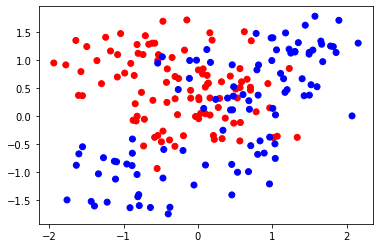

In [48]:
plt.scatter(points[:,0], points[:,1], c=c)

In [49]:
def shotgun_density(x, means=means):
    density = []
    for m in range(len(means)):  # there are m clusters 
            p=0
            for i in range(len(means[m])):   # there are len(means[m]) subclusters
                # means[m][i] is the x1, x2 center of a cluster
                p = p+ np.exp (-np.sum( - np.sqrt( ( x-means[m][i]) **2 / 2 / Rexp**2)  ))
            density.append(p)
    return(np.array(density))
shotgun_density([0,0],means)

array([1.26681281e+07, 1.47115724e+08])

In [19]:
def grideval(func):
    xgrid = np.linspace(-2.5,2.5,100) # range for flipper length
    ygrid = np.linspace(-2,2,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
    return(z1,z2)
z1,z2 = grideval(shotgun_density)

(100, 100) (100, 100) (100, 100)


In [20]:
xgrid = np.linspace(-3,4,100) # range for x1
ygrid = np.linspace(-4,4,100)  # range for x2

plt.imshow(z, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]) )
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.5)

NameError: name 'z' is not defined

In [21]:
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")

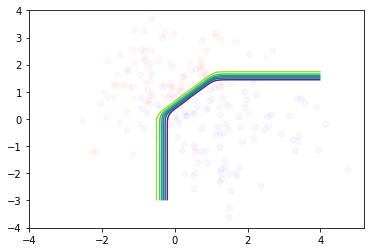

In [22]:
CS = plt.contour(yax, xax, z1/(z1+z2), levels=6, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )

In [58]:
X = points
Y = labels

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression().fit(X,Y)

In [26]:
clf.predict(X[2].reshape(1, -1))

array([0])

In [27]:
[clf.predict(X[i].reshape(1,-1)) for i in range(len(X)) ][0:10]

[array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0])]

In [64]:
def grideval_simple(func):
    xgrid = np.linspace(points[:,0].min(),points[:,0].max(),100) 
    ygrid = np.linspace(points[:,1].min(),points[:,1].max(),100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))  # contains a single sample
    return(z1)
zclass = grideval_simple(clf.predict)

(100, 100) (100, 100) (100, 100)


In [63]:
points[:,0].min(),points[:,0].max()

(-1.9387091681939599, 2.15374902379707)

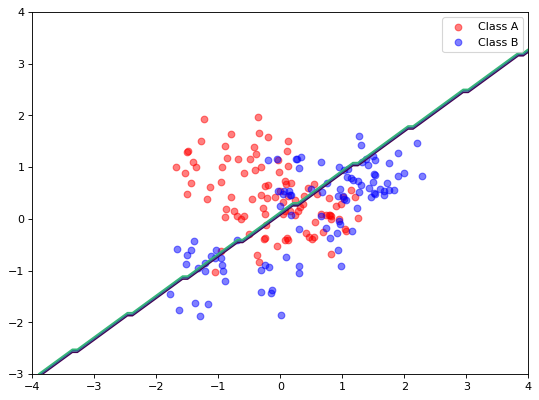

In [65]:
plt.figure(figsize=(8, 6), dpi=80)
CONTOURCLASS = plt.contour(yax, xax, zclass, levels=2, origin="lower" ) 

plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [66]:
from sklearn.naive_bayes import GaussianNB
clf5 = GaussianNB()
clf5.fit(X, Y)

GaussianNB()

In [67]:
zed = grideval_simple(clf5.predict)

(100, 100) (100, 100) (100, 100)


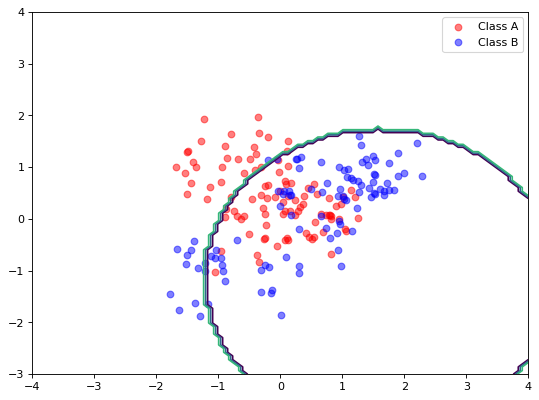

In [68]:
plt.figure(figsize=(8, 6), dpi=80)
CONTOURCLASS = plt.contour(yax, xax, zed, levels=2, origin="lower" ) 

plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn import datasets

In [70]:
means1 = np.mean(points1, axis=0)
means2 = np.mean(points2, axis=0)

In [71]:
covsp0 = np.cov(points1.T); precissp0 = np.linalg.inv(covsp0)
covsp1 = np.cov(points2.T); precissp1 = np.linalg.inv(covsp1)

In [74]:
def irisdensity3(x):
    d1 = scipy.stats.multivariate_normal.pdf( x, means1,covsp0 )
    return d1

In [75]:
xgrid = np.arange(-2.5,2.5, 0.1)  # range for feature 1
ygrid = np.arange(-2.5,2.5, 0.1)  # range for feature 2 
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i],  ygrid[j], means1[2], meansp0[3]])
       # print(x)
        z[i,j]= irisdensity3(x)
print(z.shape)

(50, 50) (50, 50) (50, 50)


NameError: name 'meansp0' is not defined

In [76]:
def dense(x):
    return scipy.stats.multivariate_normal.pdf(x, mean, precision)

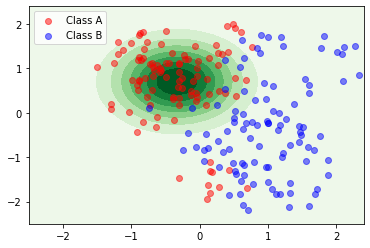

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x, y = np.mgrid[-2.5:2.5:.1, -2.5:2.5:.1]
rv = multivariate_normal([np.mean(means_1[:,0]),np.mean(means_1[:,1])], [[1/3,0],[0,1/3]])
data = np.dstack((x, y))
z = rv.pdf(data)
plt.contourf(x, y, z, cmap='Greens')
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [99]:
z

array([[3.00062138e-10, 7.13114708e-10, 1.64466994e-09, ...,
        1.15506466e-06, 6.70192049e-07, 3.77366559e-07],
       [5.97683396e-10, 1.42042853e-09, 3.27596117e-09, ...,
        2.30073335e-06, 1.33493237e-06, 7.51663399e-07],
       [1.15532015e-09, 2.74568394e-09, 6.33242279e-09, ...,
        4.44731043e-06, 2.58042013e-06, 1.45296302e-06],
       ...,
       [2.87250482e-10, 6.82667081e-10, 1.57444800e-09, ...,
        1.10574724e-06, 6.41577077e-07, 3.61254262e-07],
       [1.39690071e-10, 3.31981386e-10, 7.65654948e-10, ...,
        5.37725505e-07, 3.11999294e-07, 1.75678151e-07],
       [6.59236852e-11, 1.56671381e-10, 3.61334169e-10, ...,
        2.53767834e-07, 1.47241268e-07, 8.29074751e-08]])

In [91]:
np.cov([1/3,0],[0,1/3])

array([[ 0.05555556, -0.05555556],
       [-0.05555556,  0.05555556]])

In [88]:
np.cov(points2[:,0],points2[:,1])

array([[1.15169699, 0.71626724],
       [0.71626724, 0.8151423 ]])

In [7]:
means_1

array([[ 0.30784535,  1.74824133],
       [-0.19318927,  0.46313916],
       [-0.32864777,  1.17184131],
       [ 0.18744917,  0.72538874],
       [-0.6381527 ,  1.20591642],
       [ 0.09716341, -1.48233656],
       [-0.99943742,  1.21999507],
       [-0.64641487,  0.91436575],
       [-0.25540042,  0.98548648],
       [-0.8799928 ,  0.07944829]])

In [14]:
means_1[0][0]

0.30784535070493313

In [22]:
x, y = np.mgrid[-2.5:2.5:.1, -2.5:2.5:.1]
rva1 = multivariate_normal([np.mean(means_1[0][0]),np.mean(means_1[0][1])], [[1/3,0],[0,1/3]])
data = np.dstack((x, y))

In [159]:
def seg(x):
    A_val=0
    B_val=0
    for i in range(0,10):
        rva = multivariate_normal([np.mean(means_1[i][0]),np.mean(means_1[i][1])], [[1/3,0],[0,1/3]])
        rvb = multivariate_normal([np.mean(means_2[i][0]),np.mean(means_2[i][1])], [[1/3,0],[0,1/3]])
        a=rva.pdf(x)
        b=rvb.pdf(x)
        A_val+=a
        B_val+=b
    if A_val>=B_val:
        return(1)
    elif A_val<B_val:
        return(0)

In [170]:
seg([2,-2])

0

In [36]:
data

array([[[-2.5, -2.5],
        [-2.5, -2.4],
        [-2.5, -2.3],
        ...,
        [-2.5,  2.2],
        [-2.5,  2.3],
        [-2.5,  2.4]],

       [[-2.4, -2.5],
        [-2.4, -2.4],
        [-2.4, -2.3],
        ...,
        [-2.4,  2.2],
        [-2.4,  2.3],
        [-2.4,  2.4]],

       [[-2.3, -2.5],
        [-2.3, -2.4],
        [-2.3, -2.3],
        ...,
        [-2.3,  2.2],
        [-2.3,  2.3],
        [-2.3,  2.4]],

       ...,

       [[ 2.2, -2.5],
        [ 2.2, -2.4],
        [ 2.2, -2.3],
        ...,
        [ 2.2,  2.2],
        [ 2.2,  2.3],
        [ 2.2,  2.4]],

       [[ 2.3, -2.5],
        [ 2.3, -2.4],
        [ 2.3, -2.3],
        ...,
        [ 2.3,  2.2],
        [ 2.3,  2.3],
        [ 2.3,  2.4]],

       [[ 2.4, -2.5],
        [ 2.4, -2.4],
        [ 2.4, -2.3],
        ...,
        [ 2.4,  2.2],
        [ 2.4,  2.3],
        [ 2.4,  2.4]]])

In [21]:
rva1.pdf([0,0])

0.004228366465681888

In [160]:
def grideval_simple(func):
    xgrid = np.linspace(min(min(points1[:,0]),min(points2[:,0])),max(max(points1[:,0]),min(points2[:,0])),100) 
    ygrid = np.linspace(min(min(points1[:,1]),min(points2[:,1])),max(max(points1[:,1]),min(points2[:,1])),100)
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))
    return(z1)

In [161]:
ace = grideval_simple(seg)

(100, 100) (100, 100) (100, 100)


In [162]:
ace

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

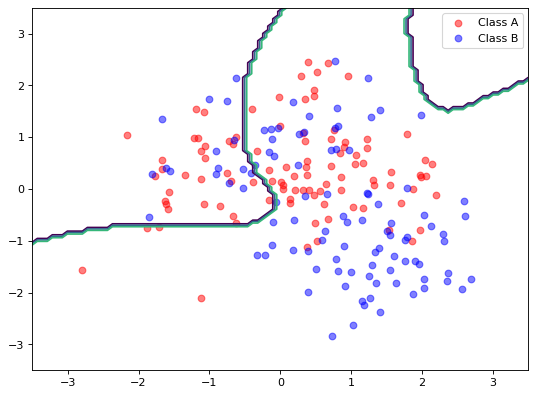

In [163]:
plt.figure(figsize=(8, 6), dpi=80)
CONTOURCLASS = plt.contour(yax, xax, ace, levels=2, origin="lower" )
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [115]:
xgrid = np.linspace(-3.5,3.5,100) 
ygrid = np.linspace(-3.5,3.5,100)
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")

In [106]:
points1[:,1].max()

2.594051470745209

In [91]:
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in ago.reshape(-1)]

In [58]:
ago = np.array(ace)

In [59]:
ago

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

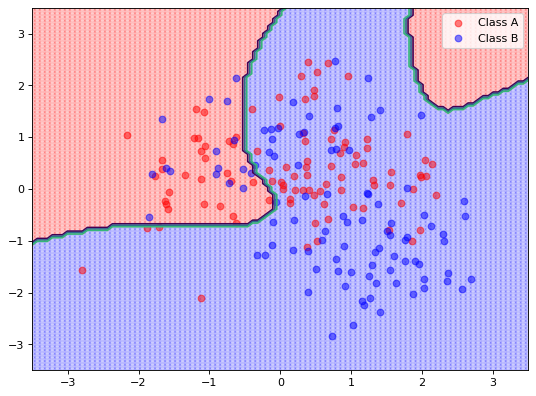

In [164]:
plt.figure(figsize=(8, 6), dpi=80)
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in ace.reshape(-1)]
CONTOURCLASS = plt.contour(yax, xax, ace, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [122]:
def seg1(x):
    A_val=0
    B_val=0
    for i in range(0,10):
        rva = multivariate_normal([np.mean(means_1[i][0]),np.mean(means_1[i][1])], [[1/5,0],[0,1/5]])
        rvb = multivariate_normal([np.mean(means_2[i][0]),np.mean(means_2[i][1])], [[1/5,0],[0,1/5]])
        a=rva.pdf(x)
        b=rvb.pdf(x)
        A_val+=a
        B_val+=b
    if A_val>B_val:
        return(1)
    elif A_val<B_val:
        return(0)

In [71]:
def grideval_simple(func):
    xgrid = np.linspace(-2.5,2.5,100) 
    ygrid = np.linspace(-2.5,2.5,100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))
    return(z1)
taro = grideval_simple(seg1)

(100, 100) (100, 100) (100, 100)


In [142]:
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in ago.reshape(-1)]

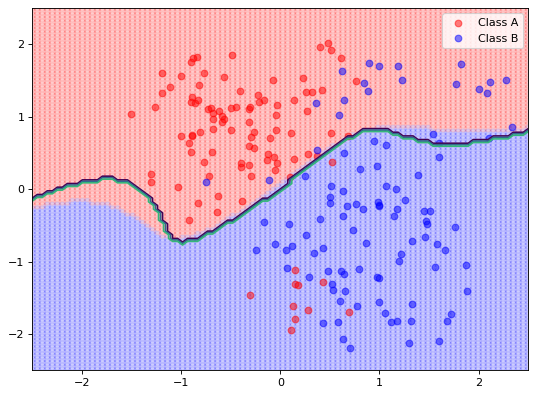

In [72]:
plt.figure(figsize=(8, 6), dpi=80)
CONTOURCLASS = plt.contour(yax, xax, taro, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

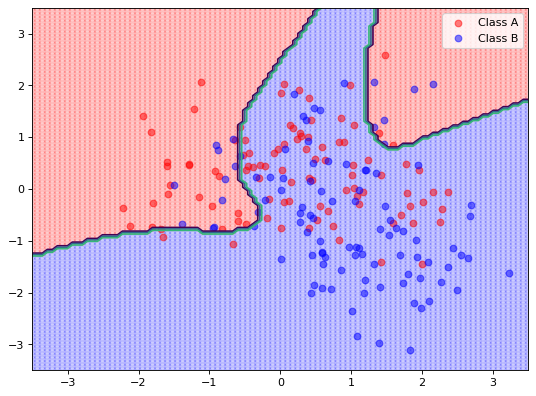

In [118]:
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in ace.reshape(-1)]
plt.figure(figsize=(8, 6), dpi=80)
CONTOURCLASS = plt.contour(yax, xax, ace, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

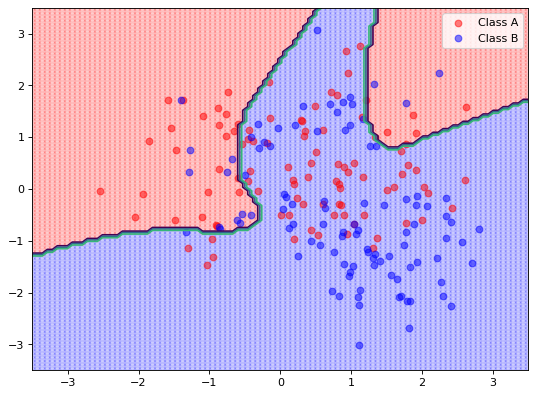

In [120]:
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in ace.reshape(-1)]
plt.figure(figsize=(8, 6), dpi=80)
CONTOURCLASS = plt.contour(yax, xax, ace, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [121]:
def generate_some_data(means):
    points = []
    for m in means:        
        for i in range(10):
            z = scipy.stats.multivariate_normal.rvs(mean=[m[0],m[1]], cov=np.array([[1/5, 0], [0, 1/5]]), size=1)
            points.append(z)
    return(points)
a = generate_some_data(means_1)
points1 = np.array(a)
points2 = np.array(generate_some_data(means_2))

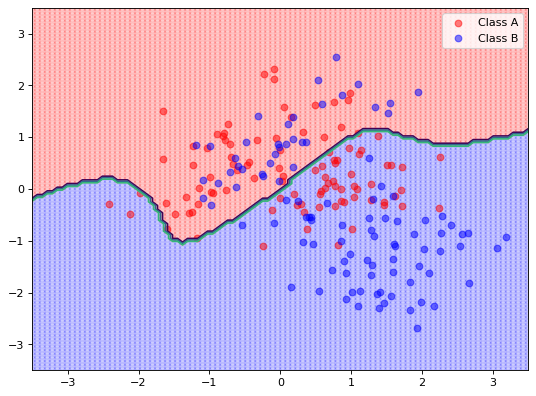

In [124]:
plt.figure(figsize=(8, 6), dpi=80)
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in taro.reshape(-1)]
CONTOURCLASS = plt.contour(yax, xax, taro, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [126]:
def seg2(x):
    A_val=0
    B_val=0
    for i in range(0,10):
        rva = multivariate_normal([np.mean(means_1[i][0]),np.mean(means_1[i][1])], [[1/10,0],[0,1/10]])
        rvb = multivariate_normal([np.mean(means_2[i][0]),np.mean(means_2[i][1])], [[1/10,0],[0,1/10]])
        a=rva.pdf(x)
        b=rvb.pdf(x)
        A_val+=a
        B_val+=b
    if A_val>B_val:
        return(1)
    elif A_val<B_val:
        return(0)

In [127]:
def grideval_simple(func):
    xgrid = np.linspace(-2.5,2.5,100) 
    ygrid = np.linspace(-2.5,2.5,100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))
    return(z1)
jack = grideval_simple(seg2)

(100, 100) (100, 100) (100, 100)


In [132]:
def generate_some_data(means,x):
    points = []
    for m in means:        
        for i in range(10):
            z = scipy.stats.multivariate_normal.rvs(mean=[m[0],m[1]], cov=np.array([[x, 0], [0, x]]), size=1)
            points.append(z)
    return(points)
a = generate_some_data(means_1,1/10)
points1 = np.array(a)
points2 = np.array(generate_some_data(means_2,1/10))

def seg(x):
    A_val=0
    B_val=0
    for i in range(0,10):
        rva = multivariate_normal([np.mean(means_1[i][0]),np.mean(means_1[i][1])], [[1/10,0],[0,1/10]])
        rvb = multivariate_normal([np.mean(means_2[i][0]),np.mean(means_2[i][1])], [[1/10,0],[0,1/10]])
        a=rva.pdf(x)
        b=rvb.pdf(x)
        A_val+=a
        B_val+=b
    if A_val>B_val:
        return(1)
    elif A_val<B_val:
        return(0)

In [133]:
def grid(func):
    xgrid = np.linspace(min(min(points1[:,0]),min(points2[:,0])),max(max(points1[:,0]),min(points2[:,0])),100) 
    ygrid = np.linspace(min(min(points1[:,1]),min(points2[:,1])),max(max(points1[:,1]),min(points2[:,1])),100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))
    return(z1)
jack = grid(seg)

(100, 100) (100, 100) (100, 100)


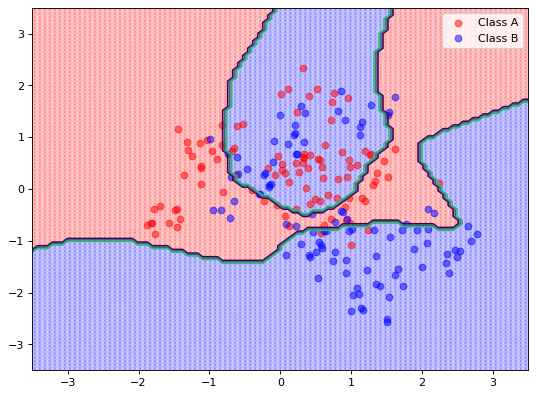

In [130]:
plt.figure(figsize=(8, 6), dpi=80)
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in jack.reshape(-1)]
CONTOURCLASS = plt.contour(yax, xax, jack, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

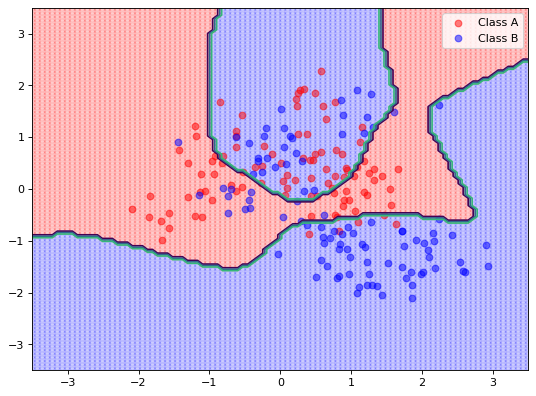

In [134]:
plt.figure(figsize=(8, 6), dpi=80)
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in jack.reshape(-1)]
CONTOURCLASS = plt.contour(yax, xax, jack, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()

In [149]:
def generate_some_data(means):
    points = []
    for m in means:        
        for i in range(10):
            z = scipy.stats.multivariate_normal.rvs(mean=[m[0],m[1]], cov=np.array([[1/50, 0], [0, 1/50]]), size=1)
            points.append(z)
    return(points)
a = generate_some_data(means_1)
points1 = np.array(a)
points2 = np.array(generate_some_data(means_2))

In [150]:
def seg4(x):
    A_val=0
    B_val=0
    for i in range(0,10):
        rva = multivariate_normal([np.mean(means_1[i][0]),np.mean(means_1[i][1])], [[1/50,0],[0,1/50]])
        rvb = multivariate_normal([np.mean(means_2[i][0]),np.mean(means_2[i][1])], [[1/50,0],[0,1/50]])
        a=rva.pdf(x)
        b=rvb.pdf(x)
        A_val+=a
        B_val+=b
    if A_val>B_val:
        return(1)
    elif A_val<B_val:
        return(0)

In [151]:
def grid(func):
    xgrid = np.linspace(min(min(points1[:,0]),min(points2[:,0])),max(max(points1[:,0]),min(points2[:,0])),100) 
    ygrid = np.linspace(min(min(points1[:,1]),min(points2[:,1])),max(max(points1[:,1]),min(points2[:,1])),100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))
    return(z1)
man = grid(seg4)

(100, 100) (100, 100) (100, 100)


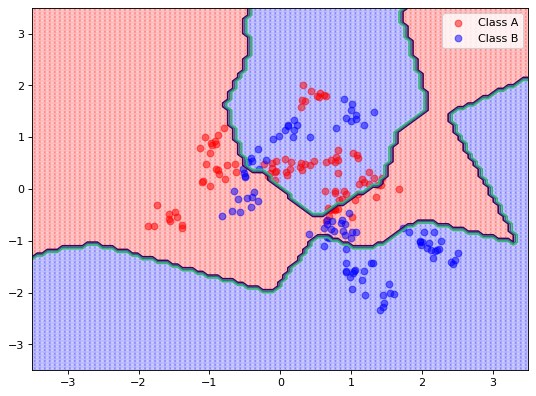

In [152]:
plt.figure(figsize=(8, 6), dpi=80)
colorsnum = { 0 : "red", 1: "blue"}
c = [colorsnum[i] for i in man.reshape(-1)]
CONTOURCLASS = plt.contour(yax, xax, man, levels=2, origin="lower" )
plt.scatter(yax,xax, color=c, alpha=0.1)
plt.scatter(points1[:,0], points1[:,1], c="red", alpha=0.5, label="Class A")
plt.scatter(points2[:,0], points2[:,1], c="blue", alpha=0.5, label="Class B")
plt.legend()